In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [28]:
df = pd.read_csv('./datasets/airline_passengers.csv', index_col='Month', parse_dates=True)

df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [30]:
train = df.iloc[:109] #.loc[:'1950-01-01']
test = df.iloc[108:]

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1958-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [26]:
test_preds = fitted_model.forecast(36) # 3 years forecast
test_preds

1958-02-01    339.147173
1958-03-01    399.285641
1958-04-01    394.236519
1958-05-01    402.546175
1958-06-01    473.127774
1958-07-01    521.796434
1958-08-01    514.515557
1958-09-01    446.221756
1958-10-01    385.436241
1958-11-01    339.649119
1958-12-01    381.460327
1959-01-01    401.213804
1959-02-01    387.163029
1959-03-01    455.815795
1959-04-01    450.051827
1959-05-01    459.537950
1959-06-01    540.112366
1959-07-01    595.671450
1959-08-01    587.359759
1959-09-01    509.397042
1959-10-01    440.005621
1959-11-01    387.736040
1959-12-01    435.466805
1960-01-01    458.016944
1960-02-01    441.976884
1960-03-01    520.349388
1960-04-01    513.769368
1960-05-01    524.598519
1960-06-01    616.580519
1960-07-01    680.005558
1960-08-01    670.517113
1960-09-01    581.516574
1960-10-01    502.300837
1960-11-01    442.631022
1960-12-01    497.119424
1961-01-01    522.862172
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

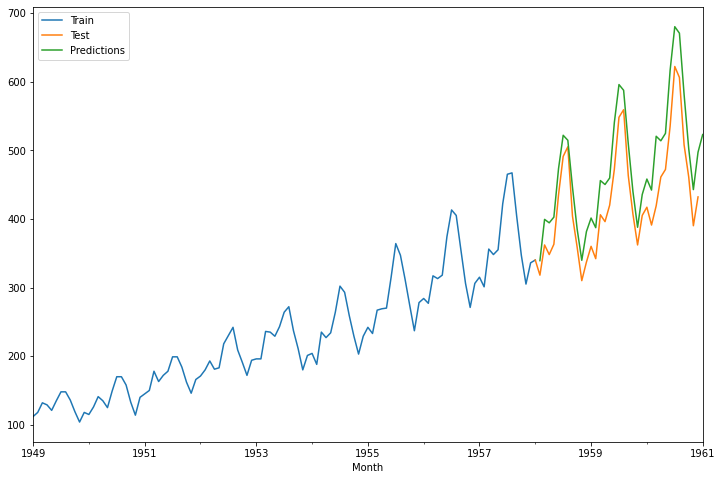

In [32]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12, 8))
test['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12, 8))
test_preds.plot(legend=True, label='Predictions')

<AxesSubplot:xlabel='Month'>

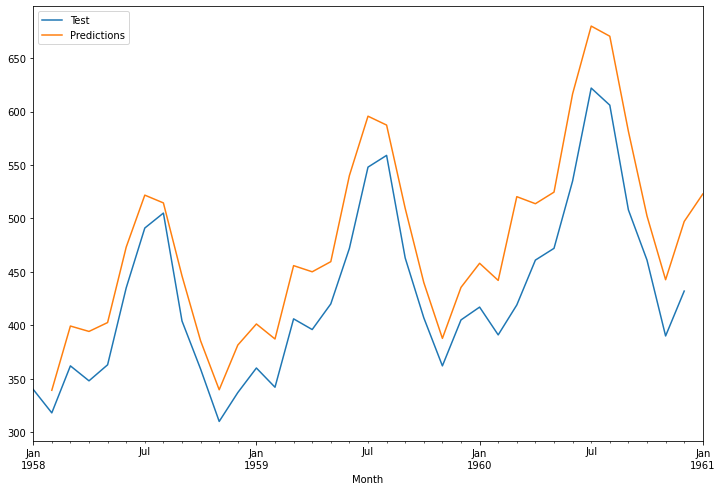

In [33]:
test['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12, 8))
test_preds.plot(legend=True, label='Predictions', xlim=['1958-01-01', '1961-01-01'])

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [35]:
mean_absolute_error(test, test_preds)

63.03099099869072

In [40]:
mean_squared_error(test, test_preds)

5614.305540233903

In [41]:
np.sqrt(mean_squared_error(test, test_preds))

74.92866968146375

**Predict future data**

In [42]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [43]:
forecast_preds = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

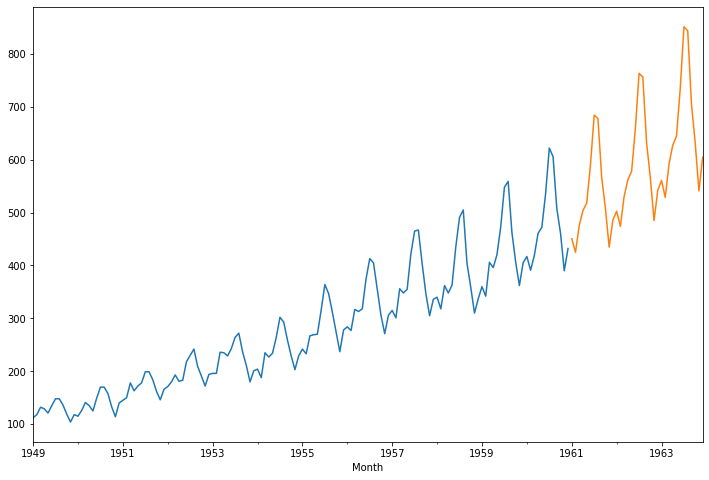

In [45]:
df['Thousands of Passengers'].plot(figsize=(12, 8))
forecast_preds.plot()